# Loading the gdrive

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


# Importing the Required Libraries

In [ ]:
import numpy as np                    # Mathematical Calculations
import pandas as pd                   # Manipulation of raw data
import matplotlib.pyplot as plt       # Plotting the graphs
import seaborn as sns
import plotly.express as px           # For creating interactive publication quality graphs
#import pickle
%matplotlib inline

# Importing the Dataset

In [ ]:
data = pd.read_excel('/gdrive/MyDrive/IISER Internship/Domain 2/Datasets/Linear Regression Model/U.S.A/Grapes.xlsx')

In [ ]:
data = round(data,3)

In [ ]:
data.head()

,Country,Year,grapes_precipitation_mm,grapes_temperature_celsius,grapes_production_million_tonnes
0,United States,1964,70.993,7.900,3.155
1,United States,1965,67.500,8.325,3.947
2,United States,1966,54.483,8.250,3.388
3,United States,1967,70.675,8.850,2.778
4,United States,1968,70.294,8.775,3.220


In [ ]:
data.tail()

,Country,Year,grapes_precipitation_mm,grapes_temperature_celsius,grapes_production_million_tonnes
45,United States,2009,75.247,9.100,6.629
46,United States,2010,72.962,9.700,6.778
47,United States,2011,78.359,9.250,6.756
48,United States,2012,62.484,10.525,6.832
49,United States,2013,71.818,8.725,7.831


# Dropping the Country Column from the dataset as it is not required for building the Linear Regression Model

In [ ]:
data.drop('Country', inplace = True, axis = 1)

In [ ]:
data.head()

,Year,grapes_precipitation_mm,grapes_temperature_celsius,grapes_production_million_tonnes
0,1964,70.993,7.900,3.155
1,1965,67.500,8.325,3.947
2,1966,54.483,8.250,3.388
3,1967,70.675,8.850,2.778
4,1968,70.294,8.775,3.220


# Finding the correlation of Grapes Production with respect to other attributes

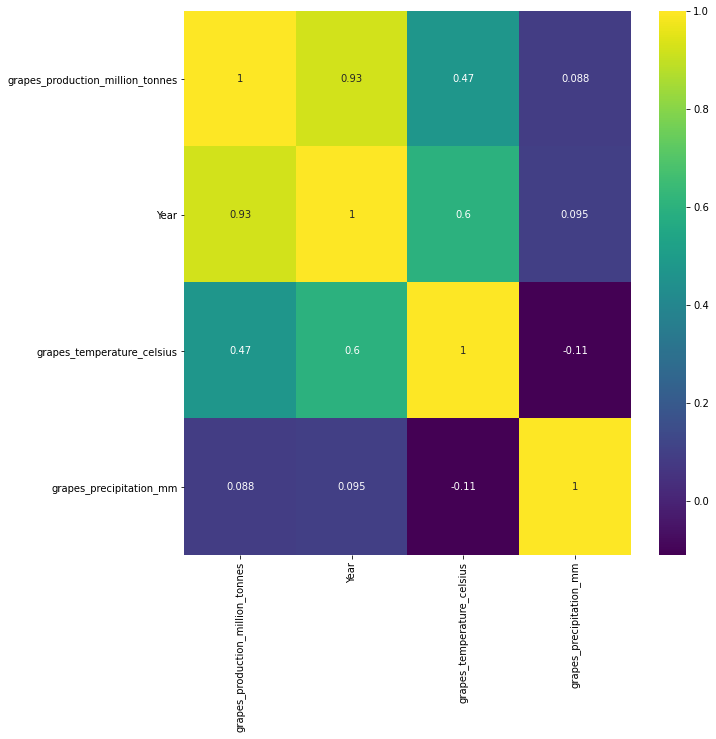

In [ ]:
# Finding the correlation
k = 5 #number of variables for heatmap
cols = data.corr().nlargest(k, 'grapes_production_million_tonnes')['grapes_production_million_tonnes'].index
cm = data[cols].corr()
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, cmap = 'viridis')

1. The grapes production is having a strong positive correlation with the temperature.

2. The grape production is having a weak positie correlation with the precipitation.

# Building the Multiple Linear Regression Model

1. Splitting the Input and the Output

In [ ]:
X = data[['Year','grapes_precipitation_mm'	,'grapes_temperature_celsius']] 
Y = data['grapes_production_million_tonnes']

2. Importing the necessary libraries required for building the multiple linear regression model from the sklearn library

In [ ]:
from sklearn import linear_model
from sklearn.metrics import r2_score

3. Splitting the dataset into training and testing dataset and training the model

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,Y, test_size = 0.2, random_state = 5)

reg = linear_model.LinearRegression() # Storing the LinearRegression() function into the variable reg
reg.fit(x_train,y_train) # Training the LinearRegression() Model Using the training dataset

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
reg.fit(x_train,y_train)
print ('Training Accuracy= ',reg.score(x_train,y_train)*100)

Training Accuracy=  85.67667258409459


4. Testing the performance of the model using the testin data

In [ ]:
y_pred = reg.predict(x_test)  # The Predict function will be used for prediciting the output
print('The Predicted Rice Production in Million Tonnes is: ',y_pred,'\n')

The Predicted Rice Production in Million Tonnes is:  [6.57045708 5.37103472 3.60279102 4.65977479 5.40728636 4.21974418
 3.46919344 6.62701802 3.26825733 4.89832789] 



In [ ]:
difference = y_test - y_pred

In [ ]:
# Comparing the Actual and the Predicted Production and difference in actual and predicted production
compare_production = pd. DataFrame({'Actual Production': y_test, 'Predicted Production': y_pred,'Difference in Production': difference})
compare_production

,Actual Production,Predicted Production,Difference in Production
42,5.757,6.570457,-0.813457
29,5.464,5.371035,0.092965
6,2.815,3.602791,-0.787791
19,5.009,4.659775,0.349225
28,5.490,5.407286,0.082714
17,4.044,4.219744,-0.175744
2,3.388,3.469193,-0.081193
43,6.402,6.627018,-0.225018
3,2.778,3.268257,-0.490257
21,5.095,4.898328,0.196672


In [ ]:
print ('Testing Accuracy= ',reg.score(x_test,y_test)*100)

Testing Accuracy=  87.93839570008527


In [ ]:
# Calaculating the error 
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print(f'The root mean squared error which is present in the model is {round(np.sqrt(mean_squared_error(y_test,y_pred)),3)}')

The root mean squared error which is present in the model is 0.423


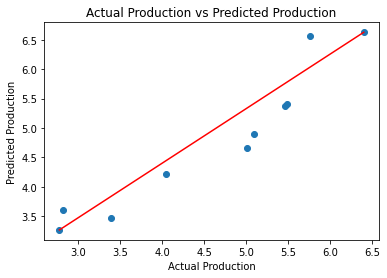

In [ ]:
plt.scatter(y_test , y_pred )
plt.title('Actual Production vs Predicted Production')
plt.xlabel('Actual Production')
plt.ylabel('Predicted Production')
plt.plot([min(y_test),max(y_test)],[min(y_pred),max(y_pred)], color='red')



In [ ]:
# Printing all the coefficients and the intercepts of the linear regression equation and calculating the R-Squared Error

# Printing the Coefficients
print('The Coefficients of the Multiple Linear Model are: ', reg.coef_,'\n')

# Printing the Intercepts
print('The value of the Intercept is: ',reg.intercept_,'\n')

# Printing the R-squared score
print('The R-square score for the model is: ', r2_score(y_test,y_pred),'\n')

The Coefficients of the Multiple Linear Model are:  [ 0.08808353 -0.00900479 -0.23869024] 

The value of the Intercept is:  -167.24321624092127 

The R-square score for the model is:  0.8793839570008527 



For linear regression models, R-squared is a goodness-of-fit measure. It shows the percentage of variance in the dependent variable that the independent factors account for when taken together. 

5. Predicting the Grapes Production by accepting the input from the user for the year, precipitation and the temperature

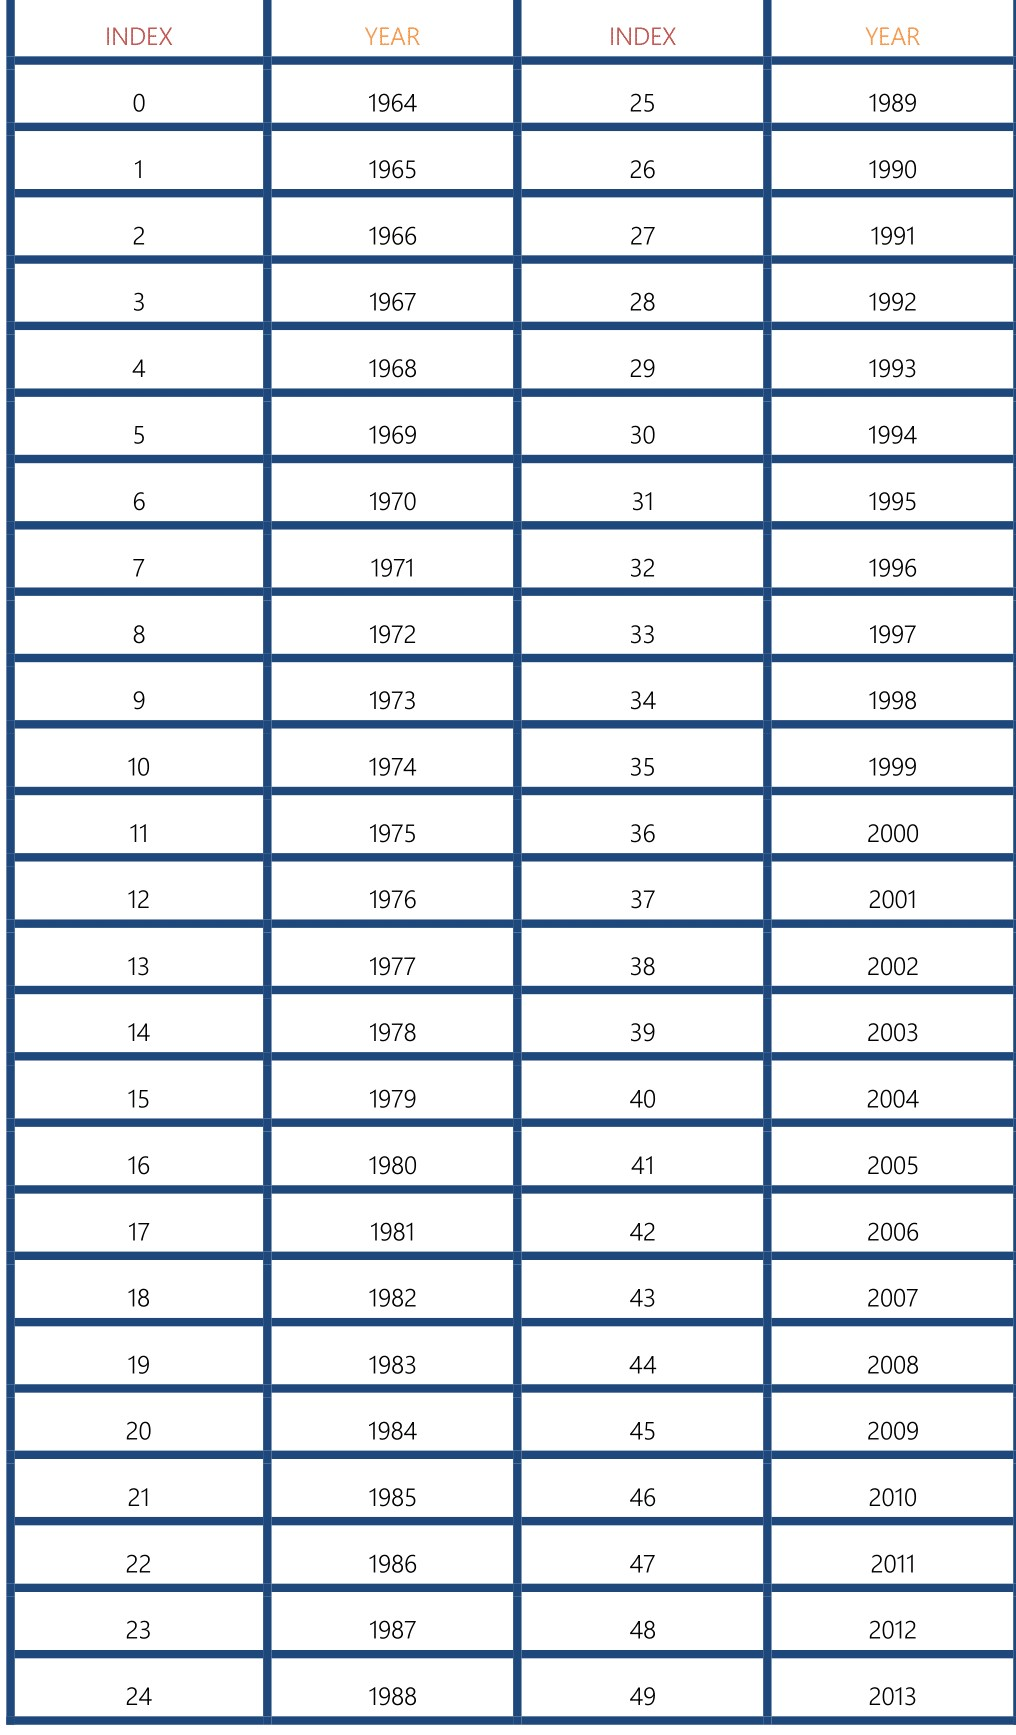

In [ ]:
# To check which index value refers to which year the user can go through the above image
data.iloc[[int(input('Please enter the index value from 0 to 49 to check the actual production for that year: '))]]

Please enter the index value from 0 to 49 to check the actual production for that year: 49


,Year,grapes_precipitation_mm,grapes_temperature_celsius,grapes_production_million_tonnes
49,2013,71.818,8.725,7.831


In [ ]:
# Defining a function for comparing the actual and the predicted production

def checkProduction():

  year = int(input('Insert the value of the year for which the production is to be predicted from 1964 to 2013: '))

  if (year > 2013 or year < 1964):
    print('Please Enter the value for the year only between 1964 and 2013 as we are analysing the production and not predicting the production after 2013 or before 1964')
    checkProduction() # Here, we are going to call the function agian so that the function will restart and again ask the user to enter the year value
  
  else:
    # Writing the Multiple Linear Regression Equation for prediciting the rice production
    rainfall = float(input('Please enter the value for the rainfall for which the production is to be checked: '))
    temperature = float(input('Please enter the value of the temperature between 20 Celsius to 30 Celsius for which the production is to be checked: '))

    result = (reg.coef_[0] * year) + (reg.coef_[1] * rainfall) + (reg.coef_[2] * temperature) + reg.intercept_

    print ('The Predicted Grapes Production in Million Tonnes for the year',year,'is',round(result,3))

# Calling the checkProduction() function 
checkProduction()


Insert the value of the year for which the production is to be predicted from 1964 to 2013: 2013
Please enter the value for the rainfall for which the production is to be checked: 71
Please enter the value of the temperature between 20 Celsius to 30 Celsius for which the production is to be checked: 8.7
The Predicted Grapes Production in Million Tonnes for the year 2013 is 7.353
